In [1]:
import pandas as pd 
df=pd.read_csv("data_titanic.csv",)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
#we fill the null ages with the means
df['Age'].fillna(29,inplace=True )
df['Age'].isnull().sum()

0

In [4]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#since S is were most people embarked ,we're gonna fill with it 
df['Embarked'].fillna('S',inplace=True)


In [7]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [9]:
#we have to delete the cabin feature
#we verify that its the only feature with missing values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [10]:
#then we delete it 
df=df.drop('Cabin',axis=1)


In [11]:
#we can see that the cabin column is deleted and that now we don't have any null value
df.isna().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
#now we have to transform our categorical datas to numerical

DATA VISUALISATION

In [13]:
import pandas as pd
df2=pd.read_csv("data_titanic.csv",)

<AxesSubplot:title={'center':'Histogram of different ages'}, xlabel='Age', ylabel='Frequency'>

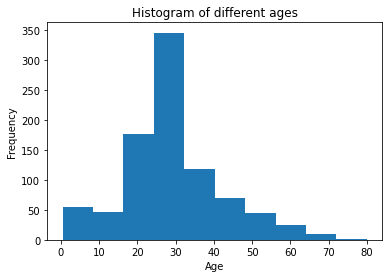

In [14]:
import matplotlib.pyplot as plt
plt.title("Histogram of different ages")
plt.xlabel("Age")
plt.ylabel("Frequency")
df['Age'].plot.hist() 

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

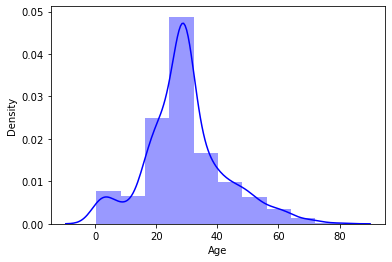

In [15]:
import seaborn as sns
sns.distplot(df['Age'],bins=10,hist=True,kde=True,color='blue')

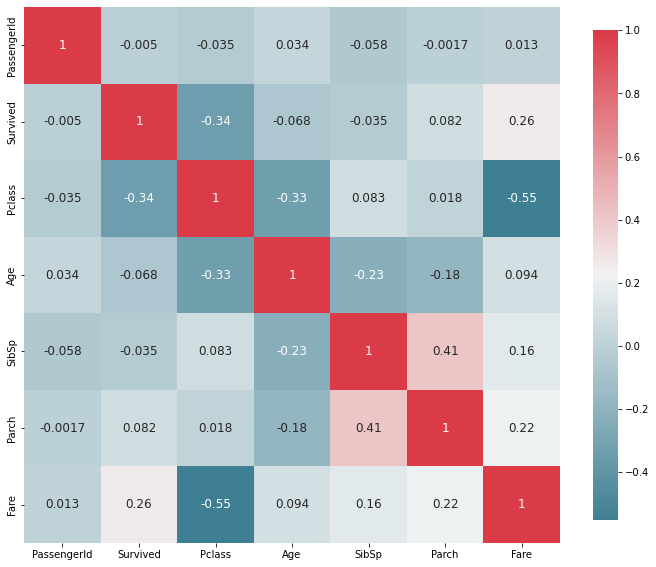

In [16]:
def plot_correlation_map(df):
    corr = df.corr()
    s,ax = plt.subplots( figsize =(12,10) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr,
        cmap=cmap,
        square=True,
        cbar_kws={'shrink': .9 },
        ax=ax,
        annot =True,
        annot_kws = {'fontsize': 12 }
        )
plot_correlation_map(df)

<AxesSubplot:>

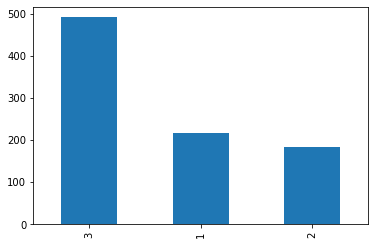

In [17]:
r=df['Pclass'].value_counts()
r.plot.bar()

<AxesSubplot:>

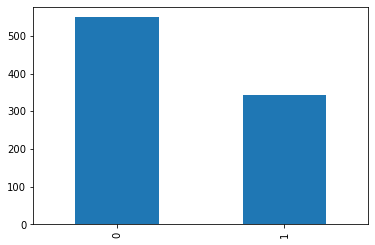

In [18]:
s=df['Survived'].value_counts()
s.plot.bar()

<AxesSubplot:>

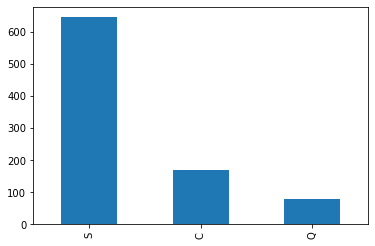

In [19]:
s=df['Embarked'].value_counts()
s.plot.bar()

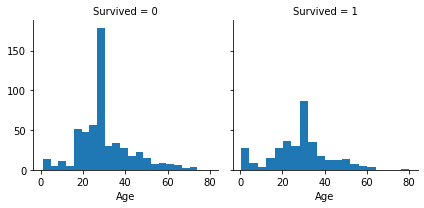

In [20]:
g=sns.FacetGrid(df,col='Survived')
g.map(plt.hist,'Age',bins=20)

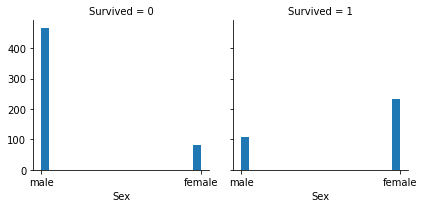

In [21]:
g=sns.FacetGrid(df,col='Survived')
g.map(plt.hist,'Sex',bins=20)

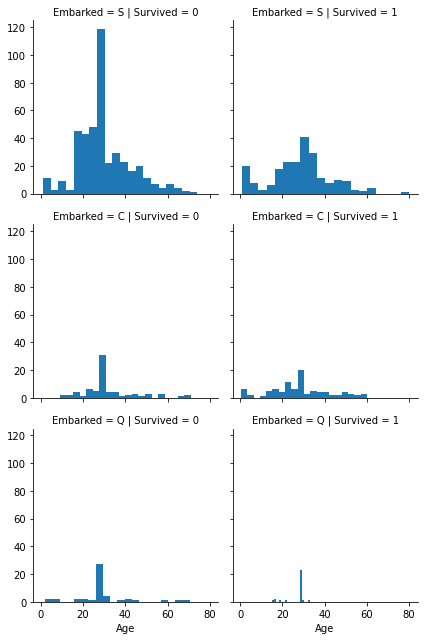

In [22]:
g=sns.FacetGrid(df,row='Embarked',col='Survived')
g.map(plt.hist,'Age',bins=20)

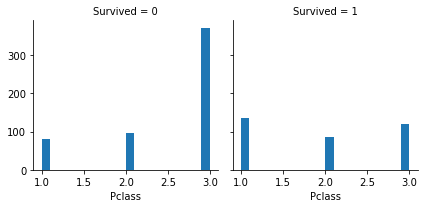

In [23]:
g=sns.FacetGrid(df,col='Survived')
g.map(plt.hist,'Pclass',bins=20)

In [24]:
df[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


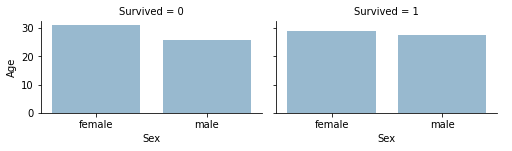

In [27]:
grid = sns.FacetGrid(df, col="Survived", size=2.2, aspect=1.6)
grid.map(sns.barplot,'Sex', 'Age', alpha=.5, ci=None)
grid.add_legend()

The survivors are less than 30 years , the gender doesnt affect wether they survive or not.

C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


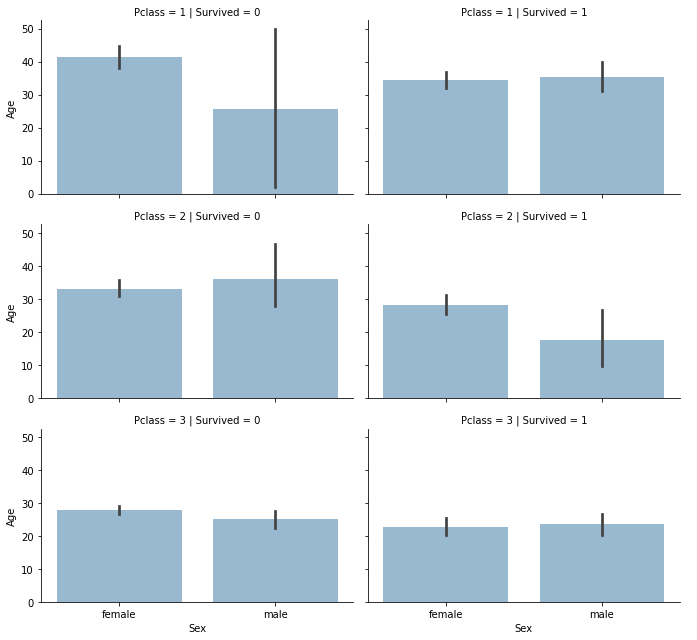

In [29]:
# Combined features 

# Sex, Age, Survived, Pclass
grid = sns.FacetGrid(df, row='Pclass', col='Survived', aspect=1.6)
# something strange is happening here; this isn't right
grid.map(sns.barplot, 'Sex','Age', alpha=.5)
grid.add_legend()

-The age range in the 3rd classe is less than 30 years old against 1 class up to 40 years old.

-The number of survivors is higher for the passenger of the 1 class.

-For the three classes in the case of survival the number of female is more than male.

-For the 3rd and 1st class in the case of non-survived the number of female and male is almost equal while for the 3 class there are more non-survived female than male

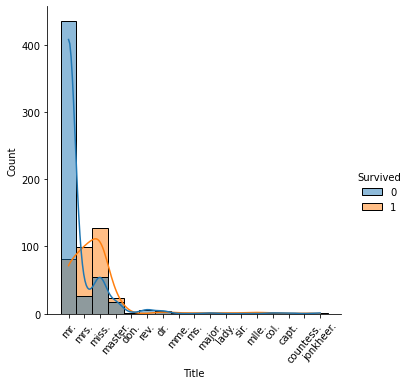

In [33]:
f= sns.displot(data=df, x="Title",hue= "Survived", kde=True)
f.set_xticklabels(rotation=50)

-More title passengers mr 

-Number of survived almost double of non survived for miss and mrs .

-The majority of mr's didn't survived.

In [34]:
import numpy as np
Title_Dictionary = {

                    "capt.":       "Officer",

                    "col.":        "Officer",

                    "major.":      "Officer",

                      "dr.":         "Officer",

                    "rev.":        "Officer",

                    "jonkheer.":   "Royalty",

                    "don.":        "Royalty",

                    "sir." :       "Royalty",

                   "lady." :      "Royalty",

                  "countess.": "Royalty",

                    "dona.":       "Royalty",

                    "mme.":        "Miss",

                    "mlle.":       "Miss",

                    "miss." :      "Miss",

                    "ms.":         "Mrs",

                    "mr." :        "Mrs",

                    "mrs." :       "Mrs",

                    "master." :    "Master"
}

In [35]:
clean_Title={
   "Title": Title_Dictionary 
}

In [36]:
df.replace(clean_Title, inplace= True)
df['Title'].value_counts()

Mrs        643
Miss       185
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


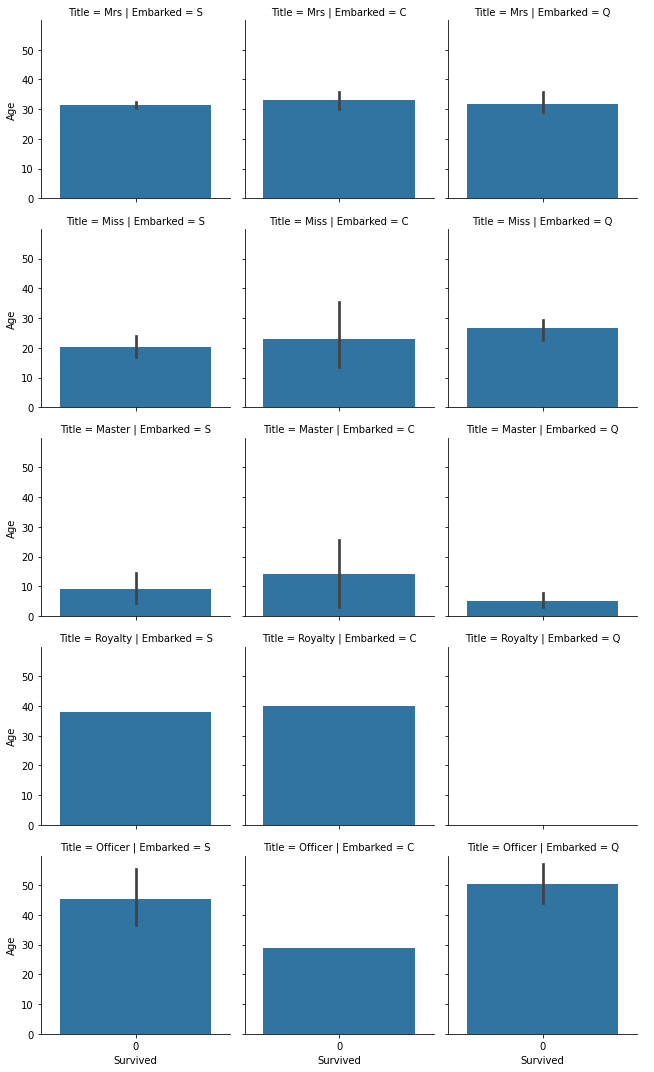

In [38]:
grid = sns.FacetGrid(df, row="Title", col="Embarked")
grid.map(sns.barplot,'Survived','Age')
grid.add_legend()